# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [195]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [196]:
import numpy as np
n = len(x)
def desmat(x, m):
    A = np.zeros( (n, m+1) )
    for j in range(m+1):
        for i in range(n):
            A[i,j] = x[i]**j
    return A        

In [197]:
def lls(x, m):
    A = desmat(x, m)
    beta = np.linalg.solve(A.T@A, A.T@y)
    return beta

In [198]:
def coef(m):
    for i in range(m+1):
        beta = lls(x, i)
        print('m = ', i, 'beta = ', beta)

In [199]:
coef(2)

m =  0 beta =  [0.79066667]
m =  1 beta =  [-0.6479869   1.46502399]
m =  2 beta =  [-1.25772058 -0.65313865  1.0667959 ]


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [247]:
def sigma(m):
    s = 0
    for k in range(n):
        s += (np.polyval(np.flip(lls(x, m)), x[k])-y[k])**2
    s1 = (s/(n-m))**(1/2)
    return s1

In [248]:
def m_st(m): 
    m1 = 0
    i = 0
    while sigma(i+1)<sigma(i):
        i+=1
    m1 = i    
    return m1

In [249]:
m_st(n)

4

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

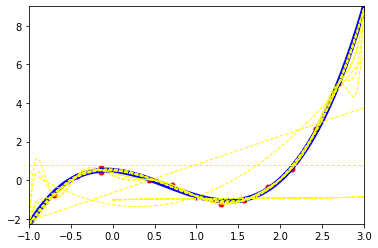

In [268]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.plot(x, y, '.', ms='10', color='red')
d = np.linspace(-1, 3, 100)
plt.plot(d, np.polyval(np.flip(lls(x, m_st(n))), d), lw=5, c = 'blue')
for m in range(n):
    if m != m_st(n):
        plt.plot(d, np.polyval(np.flip(lls(x, m)), d), d, lw=1, ls='--', c = 'yellow')
plt.axis([-1, 3, -2.25, 9])
plt.show()

Полином четвертой степени хорошо проходит через все точки. Однако это больше напоминает кубическую зависимость. 

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...